In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [61]:
df = pd.read_csv("C:/Users/shravani sharma/OneDrive/Desktop/CUSTOMER_SEG/Mall_Customers.csv")

In [62]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [63]:
clustering1 = KMeans(n_clusters= 3);

In [64]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [65]:
clustering1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [66]:
clustering1.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [67]:
df['Income Cluster'] = clustering1.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,1
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1


In [68]:
df['Income Cluster'].value_counts()

Income Cluster
0    104
1     74
2     22
Name: count, dtype: int64

In [69]:
clustering1.inertia_

24361.259213759207

In [70]:
inertia_scores=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    inertia_scores.append(kmeans.inertia_)

In [71]:
inertia_scores

[137277.28000000003,
 48660.88888888889,
 25341.28587186322,
 14647.235170393067,
 8481.496190476191,
 5443.614973544974,
 4443.607037037038,
 3367.0459893048137,
 2542.8670634920636,
 2133.321428571428]

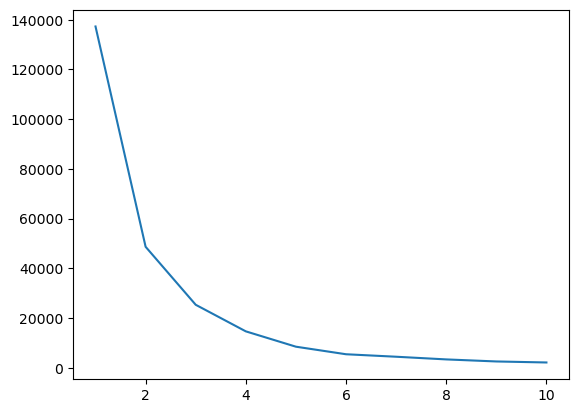

In [72]:
plt.plot(range(1,11),inertia_scores)

In [73]:
df.groupby('Income Cluster')[['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']].mean()


,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,38.663462,69.750000,49.798077
1,39.500000,33.486486,50.229730
2,37.545455,108.181818,52.000000


In [74]:
clustering2 = KMeans(n_clusters=5)
clustering2.fit(df[[ 'Annual Income (k$)',
       'Spending Score (1-100)']])
clustering2.labels_
df['Income and score cluster'] = clustering2.labels_

In [75]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Income and score cluster
0,1,Male,19,15,39,1,2
1,2,Male,21,15,81,1,4
2,3,Female,20,16,6,1,2
3,4,Female,23,16,77,1,4
4,5,Female,31,17,40,1,2


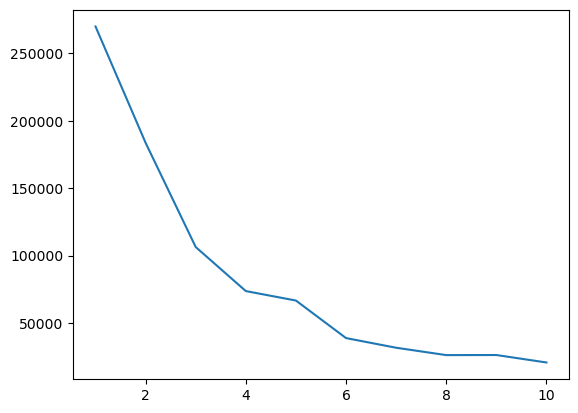

In [76]:
inertia_scores2=[]
for i in range(1,11):
    kmeans2=KMeans(n_clusters=i)
    kmeans2.fit(df[[ 'Annual Income (k$)',
       'Spending Score (1-100)']])
    inertia_scores2.append(kmeans2.inertia_)
plt.plot(range(1,11),inertia_scores2)

In [77]:
centers = pd.DataFrame(clustering2.cluster_centers_)
centers.columns = ['x','y']

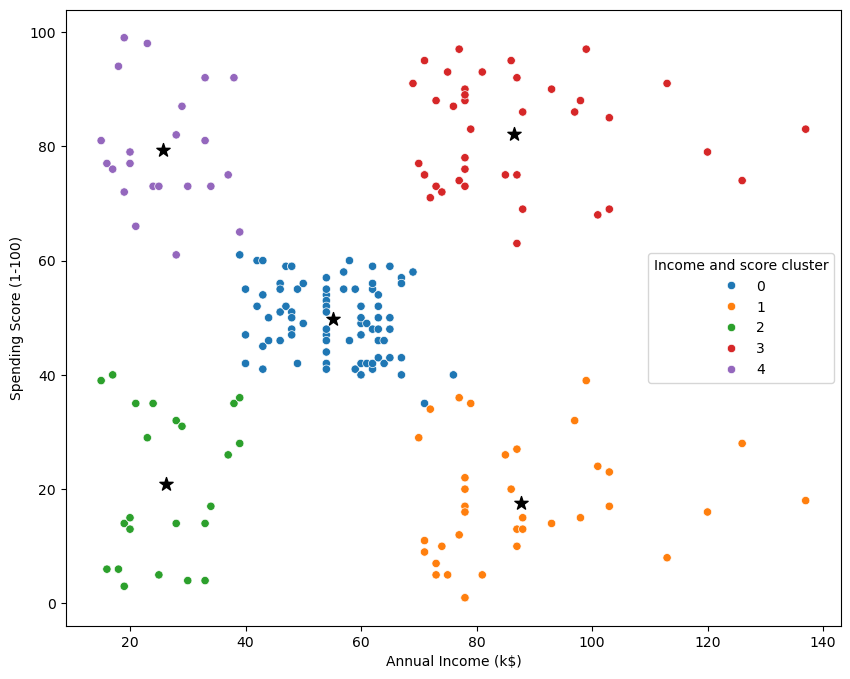

In [91]:
plt.figure(figsize=(10,8))
plt.scatter(x=centers['x'],y= centers['y'], s= 100, c= 'black', marker = '*')
sns.scatterplot(data=df, x = 'Annual Income (k$)', y ='Spending Score (1-100)', hue = 'Income and score cluster', palette= 'tab10')
plt.savefig('Clustering_bivariate.png')

In [79]:
pd.crosstab(df['Income and score cluster'], df['Gender'],normalize = 'index')

Gender,Female,Male
Income and score cluster,,
0,0.587500,0.412500
1,0.472222,0.527778
2,0.608696,0.391304
3,0.538462,0.461538
4,0.590909,0.409091


In [80]:
df.groupby('Income and score cluster')[['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income and score cluster,,,
0,42.937500,55.087500,49.712500
1,40.666667,87.750000,17.583333
2,45.217391,26.304348,20.913043
3,32.692308,86.538462,82.128205
4,25.272727,25.727273,79.363636


In [81]:
#MULTIVARIATE clustering
from sklearn.preprocessing import StandardScaler

In [82]:
scale = StandardScaler()

In [83]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Income and score cluster
0,1,Male,19,15,39,1,2
1,2,Male,21,15,81,1,4
2,3,Female,20,16,6,1,2
3,4,Female,23,16,77,1,4
4,5,Female,31,17,40,1,2


In [84]:
dff = pd.get_dummies(df,drop_first=True)
dff['Gender_Male'] = dff['Gender_Male'].astype(int)
dff.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Income and score cluster,Gender_Male
0,1,19,15,39,1,2,1
1,2,21,15,81,1,4,1
2,3,20,16,6,1,2,0
3,4,23,16,77,1,4,0
4,5,31,17,40,1,2,0


In [85]:
dff.columns

Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income Cluster', 'Income and score cluster', 'Gender_Male'],
      dtype='object')

In [86]:
dff = dff[[ 'Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Male']]
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [87]:
dff= scale.fit_transform(dff)

In [88]:
dff= pd.DataFrame(scale.fit_transform(dff))
dff

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405
...,...,...,...,...
195,-0.276302,2.268791,1.118061,-0.886405
196,0.441365,2.497807,-0.861839,-0.886405
197,-0.491602,2.497807,0.923953,1.128152
198,-0.491602,2.917671,-1.250054,1.128152


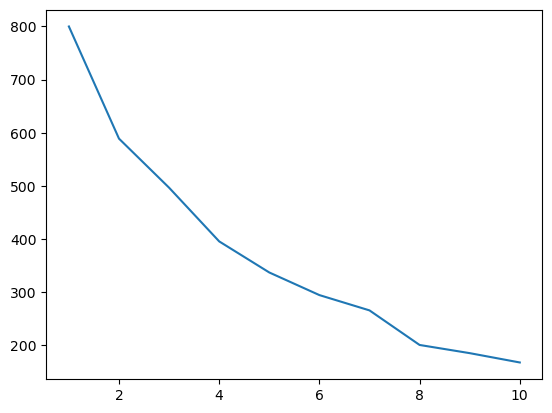

In [89]:
inertia_scores3=[]
for i in range(1,11):
    kmeans3=KMeans(n_clusters=i)
    kmeans3.fit(dff)
    inertia_scores3.append(kmeans3.inertia_)
plt.plot(range(1,11),inertia_scores3)

In [90]:
df.to_csv('Clustering.csv')